In [1]:
import matplotlib.pyplot as plt
import pandas
import numpy
import rba

from rbatools.rba_session import SessionRBA

from matplotlib.gridspec import GridSpec
import seaborn
from matplotlib.lines import Line2D


In [2]:
glucose_color="#2E4DA7"
oxygen_color="#DC5964"
acetate_color="#6DA7A4"
acetate_color="#158582"
acetate_color="#DDAA66"
growth_rate_color="#AAAABC"
contrast_line_color="#454555"
#dark_mud="#E6B327"
dark_mud="#FFE8AA"


In [3]:
title_font_size=18
ticklabel_fontsize=13
axislabel_fontsize=16
labelpad_axislables=0.5

In [6]:
Local_sensitivities=pandas.read_csv("LocalSensitivities_01.csv",index_col=0)
Local_sensitivities_001=pandas.read_csv("LocalSensitivities_all_enzymes_1percent.csv",index_col=0)



In [13]:
Local_sensitivities_001_nonzero=Local_sensitivities_001.query("Scaled_Sensitivity != 0")
Local_sensitivities_001_nonzero.sort_values(by=["Scaled_Sensitivity"])

,Mu_WT,WT_param_value,Relative_param_change,Absolute_param_change,Upper_Mu,Lower_Mu,Mu_change,Absolute_Sensitivity,Scaled_Sensitivity
EpssA_enzyme_forward_efficiency,0.320494,1.997811e+04,0.01,199.781145,0.320494,0.320494,7.641162e-08,1.912383e-10,0.000012
EtagA_enzyme_forward_efficiency,0.320494,1.176461e+04,0.01,117.646095,0.320494,0.320494,7.641162e-08,3.247521e-10,0.000012
EugtP1_enzyme_forward_efficiency,0.320494,1.976004e+04,0.01,197.600428,0.320494,0.320494,7.641162e-08,1.933488e-10,0.000012
EilvE2_enzyme_forward_efficiency,0.320494,8.463206e+05,0.01,8463.205907,0.320494,0.320494,7.641162e-08,4.514343e-12,0.000012
EnadD_enzyme_forward_efficiency,0.320494,1.997811e+04,0.01,199.781145,0.320494,0.320494,7.641162e-08,1.912383e-10,0.000012
...,...,...,...,...,...,...,...,...,...
Th_efficiency,0.320494,2.532765e+06,0.01,25327.646718,0.320598,0.320387,2.113225e-04,4.171776e-09,0.032968
Tqox_enzyme_forward_efficiency,0.320494,2.818762e+06,0.01,28187.615725,0.320913,0.320066,8.469590e-04,1.502360e-08,0.132134
Esdh_efficiency,0.320494,2.133995e+05,0.01,2133.994713,0.320963,0.320016,9.469603e-04,2.218750e-07,0.147735
Eatp_efficiency,0.320494,2.618983e+06,0.01,26189.831633,0.321270,0.319703,1.567459e-03,2.992495e-08,0.244538


In [46]:
len(list(set([i.split("_")[0] for i in Local_sensitivities_001_nonzero.index])))

245

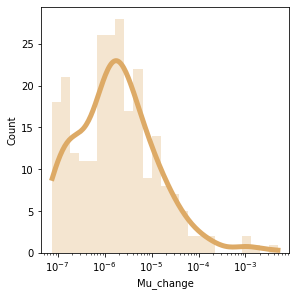

In [20]:
fig = plt.figure(figsize=(4,4),constrained_layout=True)
ax1 = fig.add_subplot(111)
seaborn.histplot(data=Local_sensitivities_001_nonzero, 
                     x="Mu_change",
                     ax=ax1,
                     alpha=0.3,
                     color=acetate_color, 
                     linewidth=0,
                     kde=True,
                     line_kws={"linewidth":5,"alpha":1,"color":"black"},
                     stat='count', 
                     #bins='auto',
                     bins=25,
                     #binrange=(-5,1),
                     fill=True,
                     log_scale=10,
                     label="Enzyme efficiencies")
plt.show()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:64: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 


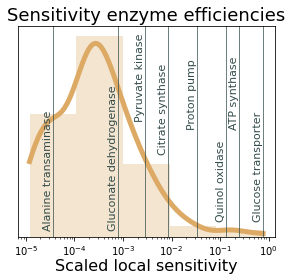

In [42]:
fig = plt.figure(figsize=(4,4),constrained_layout=True)
ax1 = fig.add_subplot(111)
seaborn.histplot(data=Local_sensitivities_001_nonzero, 
                     x="Scaled_Sensitivity",
                     ax=ax1,
                     alpha=0.3,
                     color=acetate_color, 
                     linewidth=0,
                     kde=True,
                     line_kws={"linewidth":5,"alpha":1,"color":"black"},
                     stat='count', 
                     #bins='auto',
                     bins=5,
                     #binrange=(-5,1),
                     fill=True,
                     log_scale=10,
                     label="Enzyme efficiencies")
trans = ax1.get_xaxis_transform()
#,weight="bold"
ax1.axvline(Local_sensitivities_001_nonzero.loc['TptsG_efficiency','Scaled_Sensitivity'],linestyle="solid",color="#324B4A",linewidth=1,alpha=0.7)
ax1.text(Local_sensitivities_001_nonzero.loc['TptsG_efficiency','Scaled_Sensitivity']*0.63,10,'Glucose transporter',rotation=90,color="#324B4A",fontsize=11)

ax1.axvline(Local_sensitivities_001_nonzero.loc['Eatp_efficiency','Scaled_Sensitivity'],linestyle="solid",color="#324B4A",linewidth=1,alpha=0.7)
ax1.text(Local_sensitivities_001_nonzero.loc['Eatp_efficiency','Scaled_Sensitivity']*0.63,65,'ATP synthase',rotation=90,color="#324B4A",fontsize=11)

ax1.axvline(Local_sensitivities_001_nonzero.loc['Epyk_enzyme_forward_efficiency','Scaled_Sensitivity'],linestyle="solid",color="#324B4A",linewidth=1,alpha=0.7)
ax1.text(Local_sensitivities_001_nonzero.loc['Epyk_enzyme_forward_efficiency','Scaled_Sensitivity']*0.63,70,'Pyruvate kinase',rotation=90,color="#324B4A",fontsize=11)

ax1.axvline(Local_sensitivities_001_nonzero.loc['Tqox_enzyme_forward_efficiency','Scaled_Sensitivity'],linestyle="solid",color="#324B4A",linewidth=1,alpha=0.7)
ax1.text(Local_sensitivities_001_nonzero.loc['Tqox_enzyme_forward_efficiency','Scaled_Sensitivity']*0.63,10,'Quinol oxidase',rotation=90,color="#324B4A",fontsize=11)

ax1.axvline(Local_sensitivities_001_nonzero.loc['Th_efficiency','Scaled_Sensitivity'],linestyle="solid",color="#324B4A",linewidth=1,alpha=0.7)
ax1.text(Local_sensitivities_001_nonzero.loc['Th_efficiency','Scaled_Sensitivity']*0.63,65,'Proton pump',rotation=90,color="#324B4A",fontsize=11)

ax1.axvline(Local_sensitivities_001_nonzero.loc['EcitZ_enzyme_forward_efficiency','Scaled_Sensitivity'],linestyle="solid",color="#324B4A",linewidth=1,alpha=0.7)
ax1.text(Local_sensitivities_001_nonzero.loc['EcitZ_enzyme_forward_efficiency','Scaled_Sensitivity']*0.63,50,'Citrate synthase',rotation=90,color="#324B4A",fontsize=11)

ax1.axvline(Local_sensitivities_001_nonzero.loc['Egnd_enzyme_forward_efficiency','Scaled_Sensitivity'],linestyle="solid",color="#324B4A",linewidth=1,alpha=0.7)
ax1.text(Local_sensitivities_001_nonzero.loc['Egnd_enzyme_forward_efficiency','Scaled_Sensitivity']*0.63,5,'Gluconate dehydrogenase',rotation=90,color="#324B4A",fontsize=11)

ax1.axvline(Local_sensitivities_001_nonzero.loc['EalaT_enzyme_forward_efficiency','Scaled_Sensitivity'],linestyle="solid",color="#324B4A",linewidth=1,alpha=0.7)
ax1.text(Local_sensitivities_001_nonzero.loc['EalaT_enzyme_forward_efficiency','Scaled_Sensitivity']*0.63,5,'Alanine transaminase',rotation=90,color="#324B4A",fontsize=11)

#EalaT
#EthiN

#ax1.axvline(Local_sensitivities_positive.loc['ribosome_capacity','Log_Scaled'],linestyle="dashed",color="red",label="Ribosome efficiency",linewidth=4)

#trans = ax2.get_xaxis_transform()
#ax2.axvline(abs(Local_sensitivities_negative.loc['maintenance_atp','Log_Scaled']),linestyle=(0, (3, 1, 1, 1)),color="limegreen",label="ATP maintenance target",linewidth=4)
#ax2.axvline(abs(Local_sensitivities_negative.loc['dna_concentration','Log_Scaled']),linestyle=(0, (1, 1)),color="navy",label="DNA-target",linewidth=3)
#ax2.axvline(abs(Local_sensitivities_negative.loc['mrna_concentration','Log_Scaled']),linestyle=(0, (3, 1, 1, 1, 1, 1)),color="darkorange",label="mRNA-target",linewidth=4)

#ax2.legend(frameon=False,loc='upper left')
#ax1.legend(fontsize=12, frameon=False,loc='upper right',labelspacing=0.3)
ax1.set_yticks([])
ax1.set_xlabel("Scaled local sensitivity",fontsize=axislabel_fontsize,labelpad=labelpad_axislables)
ax1.set_ylabel("")

ax1.set_title("Sensitivity enzyme efficiencies",fontsize=title_font_size)

#ax2 = fig.add_subplot(gs[4:, 0])

plt.tight_layout()
plt.savefig('Local_sensitivities_attempt_2_review.png')
